## SVM model to predict if an existing customer is more likely to buy a new car

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv("repurchase_training.csv")
data.dropna()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Target", "ID", "age_band", "gender", "car_model", "car_segment"], axis=1), data["Target"], test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model with radial basis function kernel
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# Make predictions on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9896451956753465


In [2]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25573    35]
 [  237   423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25608
           1       0.92      0.64      0.76       660

    accuracy                           0.99     26268
   macro avg       0.96      0.82      0.88     26268
weighted avg       0.99      0.99      0.99     26268



#### Heatmap:

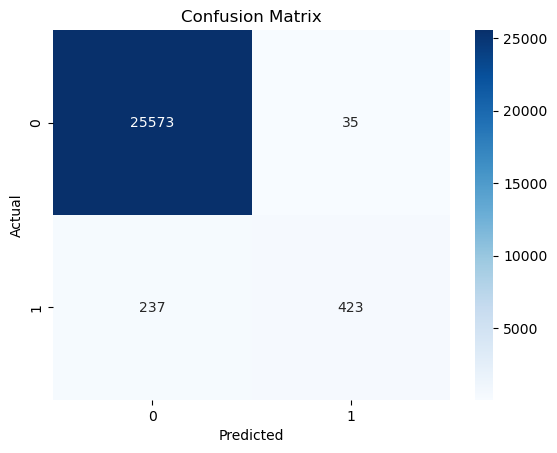

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

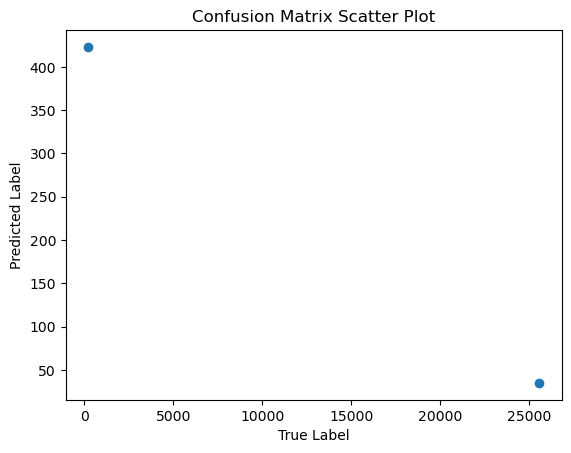

In [4]:
import matplotlib.pyplot as plt

# Define the x and y axis labels
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Define the title of the plot
plt.title('Confusion Matrix Scatter Plot')

# Create the scatter plot
plt.scatter(cm[:, 0], cm[:, 1])

# Show the plot
plt.show()

The cm confusion matrix is a 2D numpy array where the rows represent the true labels and the columns represent the predicted labels. To generate the scatter plot, we use the first column of cm as the x-axis values and the second column of cm as the y-axis values.